# Laboratório 8
Material desenvolvido por Henrique Margotte e Aurora Pozo para a disciplina de Aprendizado de Máquina, para o curso de Informática Biomédica da UFPR, semestre 2025/2. Códigos baseados em exemplos da biblioteca scikit-learn e nos notebooks Python do livro "Inteligência Artificial: Uma Abordagem de Aprendizado de Máquina", 2ª edição.

# Exemplo 1: Ensembles
Durante os laboratórios, vimos diversos modelos de Aprendizado de Máquina, desde os mais tradicionais até as cada vez mais complexas redes neurais. E vimos que cada modelo tem suas vantagens e desvantagens, conseguindo resultados melhores ou piores para cada tipo de problema, variando até mesmo entre versões diferentes de um mesmo modelo, ao ajustarmos seus hiperparâmetros. Também vimos como realizar comparações e experimentos para definir qual é o melhor para determinada tarefa.

Mas, e se não quisermos usar apenas um modelo? E se usarmos mais de uma variação de um mesmo modelo? Se combinarmos diferentes modelos de Aprendizado de Máquina, poderíamos obter melhores resultados que apenas um? Essas são as ideias trabalhadas pelo conceito de `Ensemble`.

Ensemble consiste na combinação de vários modelos para resolver um mesmo problema. Em uma tarefa de classificação, seria o uso de diferentes classificadores, ou variações de um mesmo classificador, que combinados geram a classe para o exemplo. Existem várias estratégias para realizar isso, veremos algumas a seguir. 

## Exemplo 1.1: Bagging
O *Bootstrap Aggregating*, ou *Bagging*, é uma técnica de Ensemble de classificadores homogêneos, ou seja, a combinação de variações de um mesmo classificador. No Bagging, o que é variado é a base de dados em que cada classificador é treinado. O conjunto de treinamento é dividido em *n* amostras do mesmo tamanho do conjunto original, removendo alguns exemplos e repetindo outros, com cada classificador sendo treinado com uma dessas amostras. Após o treinamento, a classificação pode ser feita através de um esquema de voto, em que cada classificador indica uma classe e a mais indicada é atribuída ao exemplo.

Esse tipo de método é mais eficaz em algoritmos considerados instáveis, que podem sofrer grandes alterações com poucas mudanças nos dados, como a Árvore de Decisão, que diferencia seu resultado apartir dos atributos escolhidos para a decisão. Utilizar Bagging ajuda a diminuir a variabilidade dos resultados. Veremos a seguir um exemplo de uso de Bagging com Árvore de Decisão na base de dados `digits`.

In [8]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# --- Carrega dataset ---
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Modelo base ---
base_tree = DecisionTreeClassifier(max_depth=None, random_state=42)

# --- Bagging ensemble ---
bagging = BaggingClassifier(
    estimator=base_tree,
    n_estimators=10,
    max_samples=0.8,
    max_features=1.0,
    bootstrap=True,
    random_state=42
)

# --- Treino ---
bagging.fit(X_train, y_train)

# --- Avaliação ---
y_pred = bagging.predict(X_test)
print("Acurácia Árvore Única:", accuracy_score(y_test, base_tree.fit(X_train, y_train).predict(X_test)))
print("Acurácia Bagging Ensemble:", accuracy_score(y_test, y_pred))


Acurácia Árvore Única: 0.8416666666666667
Acurácia Bagging Ensemble: 0.9222222222222223


Apenas com esse exemplo, já podemos verificar que o uso de Ensemble contribui para a melhora do modelo, quando comparado com apenas um exemplo.

Podemos também verificar como cada classificador, ou estimador, realiza a votação.

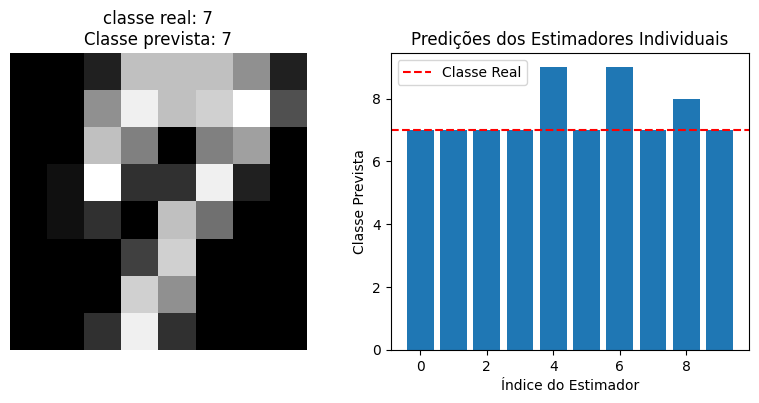

In [ ]:
# Define um exemplo para visualização
idx = 3
sample = X_test[idx]
true_label = y_test[idx]

# Obtem as previsões de cada árvore individual
individual_preds = [est.predict([sample])[0] for est in bagging.estimators_]
final_pred = bagging.predict([sample])[0]

# --- Plot ---
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(sample.reshape(8, 8), cmap='gray')
plt.title(f"classe real: {true_label}\nClasse prevista: {final_pred}")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.bar(range(len(individual_preds)), individual_preds)
plt.axhline(true_label, color='red', linestyle='--', label='Classe Real')
plt.xlabel("Índice do Estimador")
plt.ylabel("Classe Prevista")
plt.title("Predições dos Estimadores Individuais")
plt.legend()
plt.tight_layout()
plt.show()

### Random Forest
Um dos modelos mais eficientes de Aprendizado de Máquina trata-se do algoritmo de *Random Forest* (Floresta Aleatória em uma tradução direta para o português). Esse modelo na verdade é um Ensemble de Árvores de Decisão com Bagging, mas com uma alteração adicional, a cada nó das árvores, são considerados apenas alguns atributos para definir a decisão, selecionados de forma aleatória, gerando ainda mais variações nas árvores geradas. Veremos um exemplo de aplicação no scikit-learn. Os hiperparâmetros principais desse modelo é o número de árvores da floresta e a quantidade de atributos para ser utilizado em cada nó (definiremos como o padrão da biblioteca, sendo a raiz quadrada da quantidade de atributos para problemas de classificação e um terço dos atributos para regressão).

In [11]:
# Random Forest para digits
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, max_features='sqrt', max_depth=None, random_state=42)
rf.fit(X_train, y_train)
y_rf_pred = rf.predict(X_test)

print("Acurácia Random Forest:", accuracy_score(y_test, y_rf_pred))

Acurácia Random Forest: 0.9583333333333334


## Exemplo 1.2: Boosting

## Exemplo 1.3: Stacking